<a href="https://colab.research.google.com/github/rerebebeccacca/20210602class/blob/main/regrssion_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [39]:
import pandas as pd #
from sklearn.datasets import load_boston #從sklearn.datasets讀取辨識波士頓房產
boston = load_boston() #讀取
# DataFrame:表格，Series:一行/一列
df=pd.DataFrame(boston["data"],
                columns=boston["feature_names"])
df["ans"] = boston["target"]
df.to_csv("boston.csv",encoding="utf-8",index=False) 
#存成csv的檔案（csv資料為每筆中間用逗點隔開）
#必打encoding，utf-8是萬國編碼（不用的話會顯現預設編碼ansi)
#index那邊不要顯示0~149

df #印出jupyter表格（比較美）
#print(df) #印出較醜的表格


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [40]:
# df_new = df.drop(["ans"],axis=1) #axis是雙向的

In [41]:
# sklearn 前：pandas.DataFrame
# sklearn 後：np.array(多維的東西，一般二維list不用這個) 
import numpy as np
from sklearn.model_selection import train_test_split #切出一部分的參數去訓練
x,y= np.array(df.drop(["ans"],axis=1)), np.array(df["ans"])
# train_test_split([1,2,3,4],
#                  [5,6,7,8],
#                  test_size=0.25) #test_size把資料分成75%學習25%測試

#分成90% x,10% x, 90% y,10% y
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [42]:
#決策樹
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5) #任何演算法訓練限制最大深度就好（不要學太好）#這邊的maxdepth決定樹長五層
reg.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(279.0, 475.65000000000003, 'RM <= 6.838\nmse = 84.367\nsamples = 455\nvalue = 22.53'),
 Text(139.5, 339.75, 'LSTAT <= 14.4\nmse = 39.395\nsamples = 379\nvalue = 19.778'),
 Text(69.75, 203.85000000000002, 'DIS <= 1.385\nmse = 27.251\nsamples = 220\nvalue = 23.177'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'CRIM <= 7.465\nmse = 18.085\nsamples = 159\nvalue = 15.074'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'RM <= 7.435\nmse = 82.441\nsamples = 76\nvalue = 36.257'),
 Text(348.75, 203.85000000000002, 'NOX <= 0.659\nmse = 40.0\nsamples = 49\nvalue = 31.42'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.85000000000002, 'PTRATIO <= 18.3\nmse = 39.987\nsamples = 27\nvalue = 45.033'),
 Text(453.375, 67.94999999999999, '\n  (...)  \n'

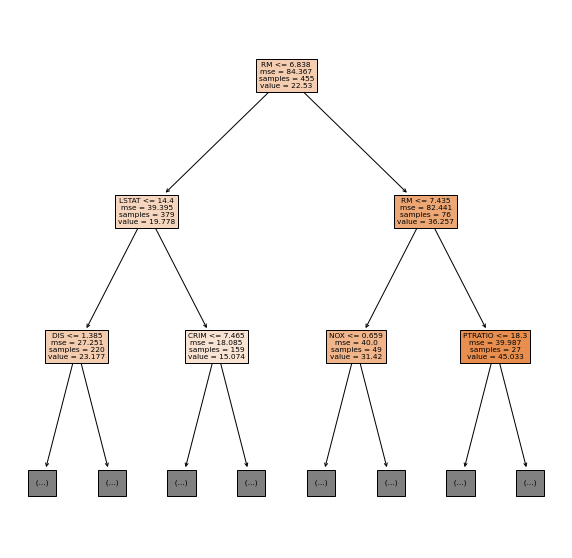

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(reg,
          feature_names=boston["feature_names"],
          filled=True,
          max_depth=2)#這邊的maxdepth決定樹只顯現出2層時他用...代替

In [44]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test) #預測那格的平均值
r2_score(y_test,pre) #做驗證


0.8377398146889274